In [1]:
import numpy as np
import matplotlib.pyplot as plt

import artpop

plt.style.use('jpg.mplstyle')
zpt_convert = artpop.load_zero_point_converter()

In [2]:
U_sun_ab = 6.35
U_sun_vega = 5.55

B_sun_ab = 5.35
B_sun_vega = 5.46

V_sun_ab = 4.81
V_sun_vega = 4.81

R_sun_ab = 4.60
R_sun_vega = 4.41

I_sun_ab = 4.52
I_sun_vega = 4.10

K_sun_ab = 5.14
K_sun_vega = 3.30

sun_mag = dict(
    U=dict(vega=U_sun_vega, ab=U_sun_ab),
    B=dict(vega=B_sun_vega, ab=B_sun_ab),
    V=dict(vega=V_sun_vega, ab=V_sun_ab),
    R=dict(vega=R_sun_vega, ab=R_sun_ab),
    I=dict(vega=I_sun_vega, ab=I_sun_ab), 
    K=dict(vega=K_sun_vega, ab=K_sun_ab)
)

L_sun = lambda m, band, system: 10**(0.4*(sun_mag[band][system] - m))

In [3]:
%%time

imf = 'kroupa'
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]


U = {}
B = {}
V = {}
R = {}
K = {}

Ubar = {}
Bbar = {}
Vbar = {}
Rbar = {}
Kbar = {}

mass = {}

for feh in [-1.5, 0.0]:
    print(f'[Fe/H] = {feh}')
    
    U[feh] = []
    B[feh] = []
    V[feh] = []
    R[feh] = []
    K[feh] = []
    
    Ubar[feh] = []
    Bbar[feh] = []
    Vbar[feh] = []
    Rbar[feh] = []
    Kbar[feh] = []
    
    mass[feh] = []

    for log_age in log_ages:
      
        mist = artpop.MISTIsochrone(log_age, feh, phot_system)    
        
        U[feh].append(mist.ssp_mag('Bessell_U', imf) + zpt_convert.to_ab('Bessell_U'))
        B[feh].append(mist.ssp_mag('Bessell_B', imf) + zpt_convert.to_ab('Bessell_B'))
        V[feh].append(mist.ssp_mag('Bessell_V', imf) + zpt_convert.to_ab('Bessell_V'))
        R[feh].append(mist.ssp_mag('Bessell_R', imf) + zpt_convert.to_ab('Bessell_R'))
        K[feh].append(mist.ssp_mag('2MASS_Ks', imf) + zpt_convert.to_ab('2MASS_Ks'))
        
        Ubar[feh].append(mist.ssp_sbf_mag('Bessell_U', imf) + zpt_convert.to_ab('Bessell_U'))
        Bbar[feh].append(mist.ssp_sbf_mag('Bessell_B', imf) + zpt_convert.to_ab('Bessell_B'))
        Vbar[feh].append(mist.ssp_sbf_mag('Bessell_V', imf) + zpt_convert.to_ab('Bessell_V'))
        Rbar[feh].append(mist.ssp_sbf_mag('Bessell_R', imf) + zpt_convert.to_ab('Bessell_R'))
        Kbar[feh].append(mist.ssp_sbf_mag('2MASS_Ks', imf) + zpt_convert.to_ab('2MASS_Ks'))

        mass[feh].append(mist.ssp_surviving_mass('kroupa'))

    U[feh] = np.array(U[feh])
    B[feh] = np.array(B[feh])
    V[feh] = np.array(V[feh])
    R[feh] = np.array(R[feh])
    K[feh] = np.array(K[feh])
    
    Ubar[feh] = np.array(Ubar[feh])
    Bbar[feh] = np.array(Bbar[feh])
    Vbar[feh] = np.array(Vbar[feh])
    Rbar[feh] = np.array(Rbar[feh])
    Kbar[feh] = np.array(Kbar[feh])
    
    mass[feh] = np.array(mass[feh])

[Fe/H] = -1.5
[Fe/H] = 0.0
CPU times: user 9min 48s, sys: 5.38 s, total: 9min 54s
Wall time: 9min 56s


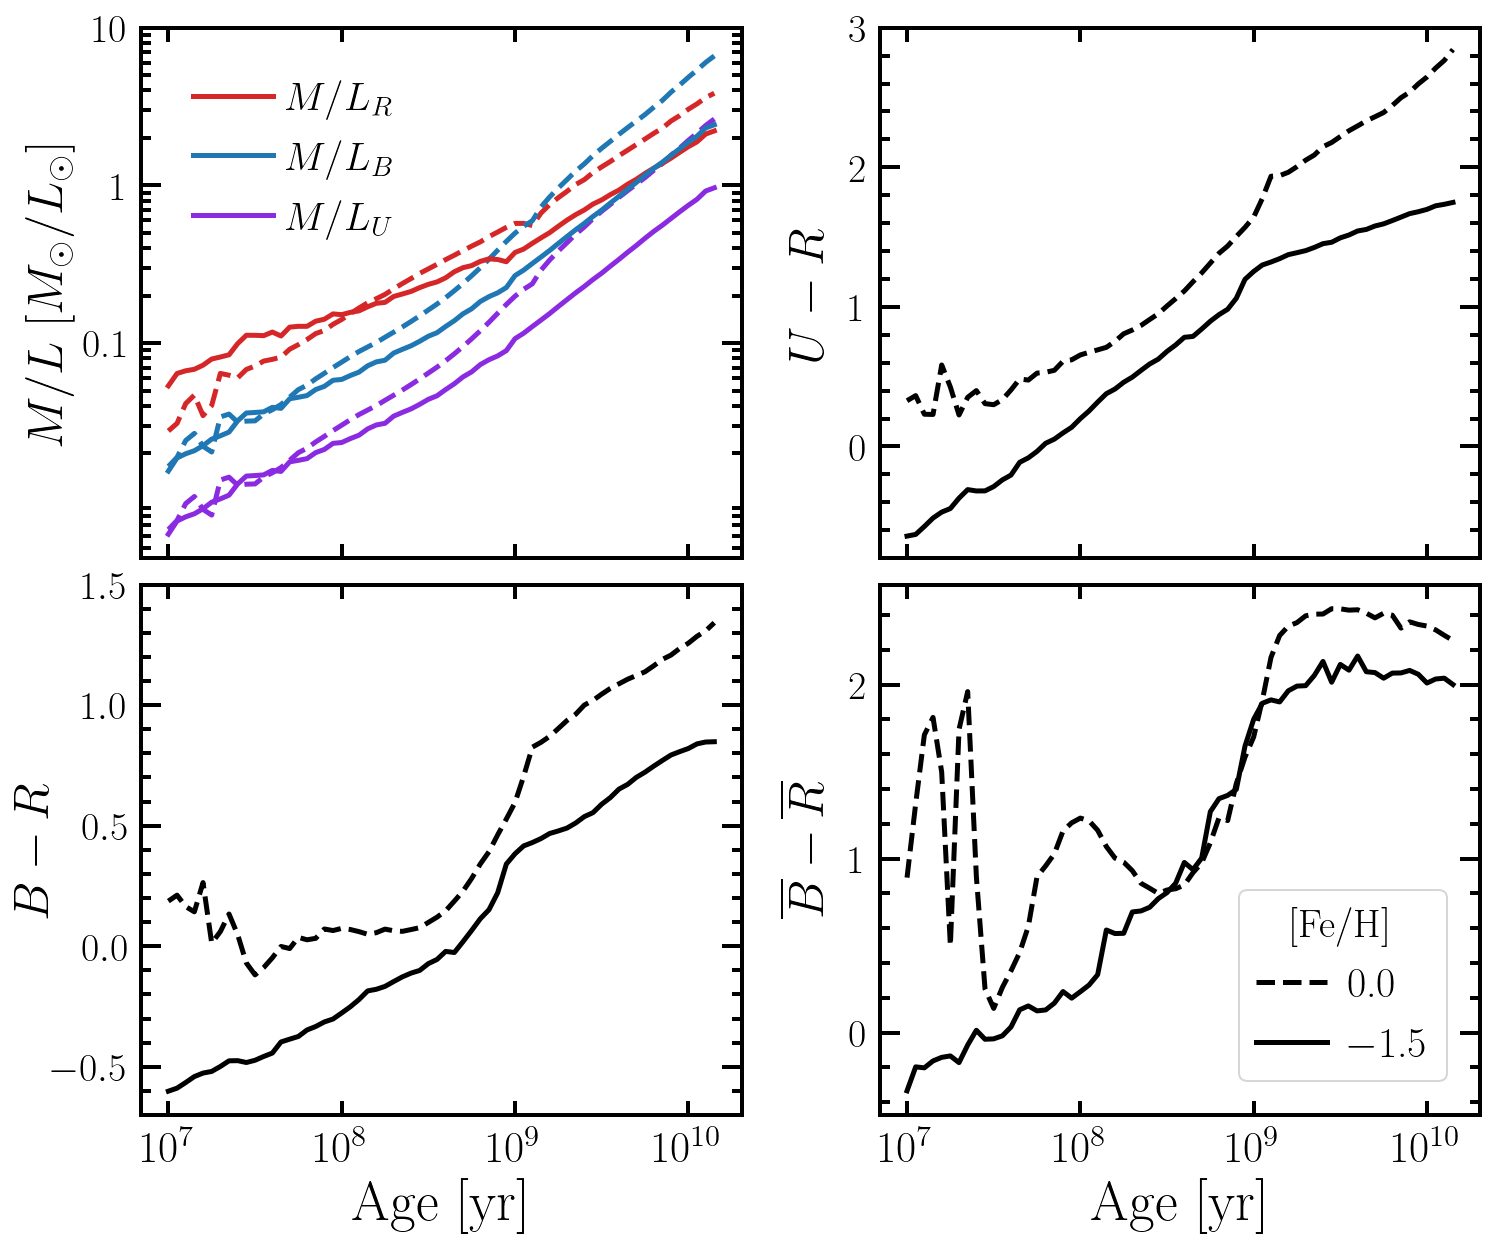

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0.05, wspace=0.23)

lw = 2.5
ax = ax.flatten()

for feh in [0.0, -1.5]:
    
    ls = '-' if feh == -1.5 else '--'
    kw = dict(lw=lw, ls=ls)
    
    label = lambda b: {0.0: '', -1.5: '$M / L_' + b + '$'}[feh]
    
    m_l = mass[feh] / L_sun(R[feh], 'R', 'ab')
    ax[0].plot(10**log_ages, m_l, c='tab:red', label=label('R'), **kw)
    
    m_l = mass[feh] / L_sun(B[feh], 'B', 'ab')
    ax[0].plot(10**log_ages, m_l, c='tab:blue', label=label('B'), **kw)

    m_l = mass[feh] / L_sun(B[feh], 'U', 'ab')
    ax[0].plot(10**log_ages, m_l, c='blueviolet', label=label('U'), **kw)    

    sign = '' if feh >= 0 else '$-$'
    ax[1].plot(10**log_ages, U[feh] - R[feh], c='k',  **kw)
    ax[2].plot(10**log_ages, B[feh] - R[feh], c='k', **kw)
    ax[3].plot(10**log_ages, Bbar[feh] - Rbar[feh], c='k', label=f'{sign}{abs(feh)}', **kw)

    
ax[0].set(yscale='log')
ax[0].set_ylim(ymax=10)
ax[0].set_ylabel('$M / L$ [$M_\odot/L_\odot$]', fontsize=25, labelpad=4)
ax[0].set_yticks([0.1, 1, 10])
ax[0].set_yticklabels([0.1, 1, 10])
ax[0].legend(loc='upper left', fontsize=20, frameon=False, borderaxespad=0.9)

ax[1].set_ylim(-0.8, 3)
ax[2].set_ylim(-0.7, 1.5)

ax[1].set_ylabel('$U - R$', fontsize=25, labelpad=8)
ax[2].set_ylabel('$B - R$', fontsize=25, labelpad=-4)
ax[3].set_ylabel('$\overline{B} - \overline{R}$', fontsize=25, labelpad=8)

ax[3].legend(loc='lower right', frameon=True, title='[Fe/H]', handlelength=1.7, 
             handletextpad=0.5, fontsize=21, title_fontsize=20, borderaxespad=0.8)

for i in range(4):
    ax[i].minorticks_on()
    ax[i].set_xscale('log')
    ax[i].tick_params('y', pad=6, labelsize=20)
    ax[i].tick_params('x', pad=8, labelsize=22, length=7)

for i in [2, 3]:
    ax[i].set_xticks([1e7, 1e8, 1e9, 1e10])
    ax[i].set_xlabel('Age [yr]', fontsize=28)